In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import keras

Using TensorFlow backend.


In [86]:
from subprocess import check_output
print(check_output(["ls", "data"]).decode("utf8"))

# Loading data with Pandas
train = pd.read_csv('data/train.csv')

data_description.txt
test.csv
train.csv



In [87]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


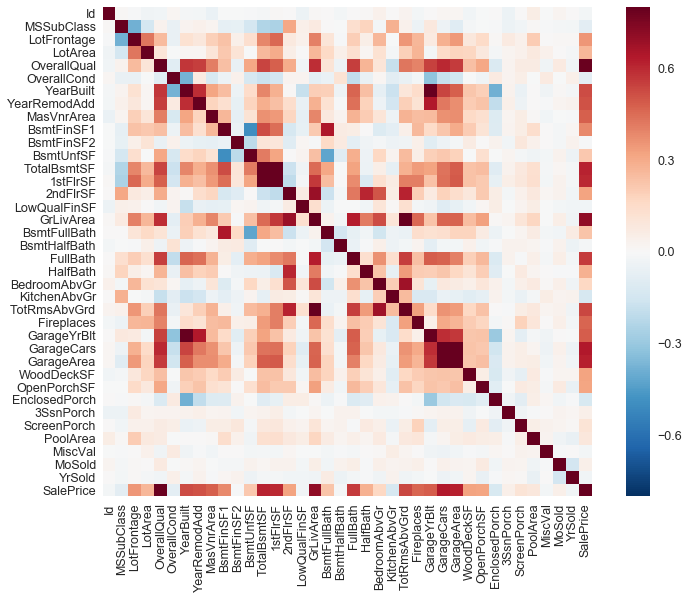

In [88]:
import seaborn as sns

corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

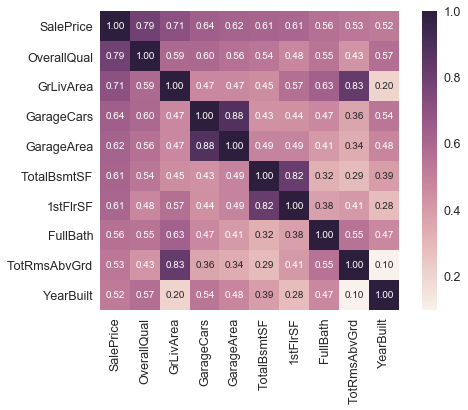

In [89]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [154]:
test_data = pd.read_csv('data/test.csv')

train_data = train.drop('SalePrice', axis=1)
train_labels = train['SalePrice']

train_labels = np.log1p(train_labels)



all_data = pd.concat([train_data, test_data])

all_data = all_data.drop('Id', 1)

all_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [155]:
# log skewness

numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = all_data[numeric_feats].apply(lambda x: x.skew()) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

all_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,3.820503,4.196175,9.094915,6.089072,5.564577,1971.312778,1984.264474,2.095752,4.226403,0.681207,...,472.874572,2.449664,2.333006,0.757435,0.066197,0.451214,0.027361,0.234767,6.213087,2007.792737
std,0.692436,0.350864,0.509882,1.409947,1.113131,30.291442,20.894344,2.624720,2.981325,1.878810,...,215.394815,2.592335,2.154239,1.771894,0.587089,1.459808,0.410265,1.240206,2.714762,1.314964
min,3.044522,3.091042,7.170888,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,3.044522,4.094345,8.919854,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,3.931826,4.234107,9.154193,6.000000,5.000000,1973.000000,1993.000000,0.000000,5.912150,0.000000,...,480.000000,0.000000,3.295837,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,4.262680,4.394449,9.356257,7.000000,6.000000,2001.000000,2004.000000,5.105945,6.598509,0.000000,...,576.000000,5.129899,4.262680,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,5.252273,5.749393,12.279537,10.000000,9.000000,2010.000000,2010.000000,7.378384,8.638525,7.331060,...,1488.000000,7.261927,6.610696,6.920672,6.232448,6.357842,6.685861,9.741027,12.000000,2010.000000


In [156]:
#dealing with missing data
total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])


good_data = all_data.drop((missing_data[missing_data['Total'] > 0]).index,1)

good_data.describe()

nf = good_data.dtypes[good_data.dtypes != "object"].index

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
data_scaled = scaler.fit_transform(good_data[nf])
good_data[nf] = pd.DataFrame(data_scaled)

good_data.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,-0.002086,0.031422,0.007534,0.009542,-0.001414,0.029108,0.013089,0.010982,0.034500,0.021727,...,0.024924,0.002362,-0.011665,-0.033404,0.033239,-0.027681,0.007510,-0.000993,0.040136,0.017458
std,0.994058,1.014852,0.980947,0.999849,0.997241,0.988098,0.983968,1.005012,1.133451,1.026486,...,0.997752,1.001315,0.999174,0.974982,1.136095,0.961369,1.069455,0.988733,0.996066,1.010155
min,-1.120845,-3.774121,-3.610024,-4.101368,-3.279137,-1.640173,-3.689017,-0.863610,-0.116932,-4.457648,...,-0.924311,-0.945126,-1.083169,-0.427545,-0.112774,-0.309144,-0.066702,-0.189329,-1.920603,-1.363569
25%,-1.120845,-0.324863,-0.772552,-0.507284,-0.571638,-0.826417,-0.684640,-0.863610,-0.116932,-0.713071,...,-0.924311,-0.945126,-1.083169,-0.427545,-0.112774,-0.309144,-0.066702,-0.189329,-0.446925,-0.602962
50%,0.160797,0.121251,-0.063185,-0.507284,0.055709,0.466021,-0.040327,-0.863610,-0.116932,0.086568,...,0.623632,-0.945126,0.429501,-0.427545,-0.112774,-0.309144,-0.066702,-0.189329,-0.078505,0.157646
75%,0.638691,0.518228,0.646183,0.391237,0.947203,0.944701,0.727446,1.148217,-0.116932,0.683791,...,0.623632,1.034085,0.882644,-0.427545,-0.112774,-0.309144,-0.066702,-0.189329,0.658334,0.918253
max,2.068083,6.246870,2.774287,3.086800,1.277386,1.231909,4.493698,1.466150,9.514978,4.239896,...,3.719517,1.660926,1.844711,3.137249,10.504893,3.922184,16.036152,7.591891,2.132012,1.678860


In [157]:
all_dummies = pd.get_dummies(good_data)

train_data = all_dummies[:train.shape[0]].as_matrix()
test_data = all_dummies[train.shape[0]:].as_matrix()

train_labels = train_labels.as_matrix()

from sklearn.model_selection import train_test_split

train_data, cv_data, train_labels, cv_labels = train_test_split(
    train_data, train_labels, test_size=0.1, random_state=0)

train_data.shape, train_labels.shape, cv_data.shape, cv_labels.shape, test_data.shape

((1314, 149), (1314,), (146, 149), (146,), (1459, 149))

In [162]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D

model = Sequential()

model.add(Dense(512, input_dim=train_data.shape[1]))
model.add(Activation('relu'))
model.add(Dropout(0.6))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

import os
os.remove("house.h5")

In [169]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

callbacks = [EarlyStopping(monitor='val_loss', min_delta=0, patience=1000, verbose=2, mode='auto'),
            ModelCheckpoint('house.h5', monitor='val_loss', save_best_only=True, verbose=0)]

try:
    model.load_weights('house.h5')
except Exception as e:
    print(e)
    pass

hist = model.fit(train_data, train_labels, 
                 batch_size = 128,
epochs = 10000,
verbose = 2,
validation_data = (cv_data, cv_labels),callbacks = callbacks)


Train on 1314 samples, validate on 146 samples
Epoch 1/10000
0s - loss: 1.2854 - val_loss: 0.3528
Epoch 2/10000
0s - loss: 1.3049 - val_loss: 0.0366
Epoch 3/10000
0s - loss: 1.2417 - val_loss: 0.0314
Epoch 4/10000
0s - loss: 1.2556 - val_loss: 0.0990
Epoch 5/10000
0s - loss: 1.2211 - val_loss: 0.0863
Epoch 6/10000
0s - loss: 1.3009 - val_loss: 0.0566
Epoch 7/10000
0s - loss: 1.3523 - val_loss: 0.0413
Epoch 8/10000
0s - loss: 1.3037 - val_loss: 0.0997
Epoch 9/10000
0s - loss: 1.3107 - val_loss: 0.1087
Epoch 10/10000
0s - loss: 1.2914 - val_loss: 0.1211
Epoch 11/10000
0s - loss: 1.3361 - val_loss: 0.0432
Epoch 12/10000
0s - loss: 1.2170 - val_loss: 0.0340
Epoch 13/10000
0s - loss: 1.1315 - val_loss: 0.0527
Epoch 14/10000
0s - loss: 1.2524 - val_loss: 0.0860
Epoch 15/10000
0s - loss: 1.1802 - val_loss: 0.0820
Epoch 16/10000
0s - loss: 1.2261 - val_loss: 0.0540
Epoch 17/10000
0s - loss: 1.2788 - val_loss: 0.0554
Epoch 18/10000
0s - loss: 1.3360 - val_loss: 0.0936
Epoch 19/10000
0s - loss: 

In [170]:
score = model.evaluate(cv_data, cv_labels, batch_size=16, verbose=2)

print(score)

0.0243617665686


In [168]:
predictions = model.predict(test_data, verbose=0)

denorm = np.exp(predictions) - 1

test_csv = pd.read_csv('data/test.csv')

submissions=pd.DataFrame({"Id": test_csv['Id'].values,
                         "SalePrice": denorm.flatten()})
submissions.to_csv("predictions.csv", index=False, header=True)